In [1]:
import pandas as pd
import numpy as np
!pip install wget
import wget

In [2]:
data = 'https://github.com/lohithkilaru/mlzoomcamp/blob/main/car%20dataset.csv'

In [3]:
!wget $data

--2025-06-23 16:49:50--  https://github.com/lohithkilaru/mlzoomcamp/blob/main/car%20dataset.csv
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘car dataset.csv.8’

car dataset.csv.8       [ <=>                ]   1.64M  9.60MB/s    in 0.2s    

2025-06-23 16:49:51 (9.60 MB/s) - ‘car dataset.csv.8’ saved [1720436]



In [4]:
df = pd.read_csv('car dataset.csv')

In [5]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [7]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [8]:
object_fields = list(df.dtypes[df.dtypes == 'object'].index)
object_fields

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [9]:
for col in object_fields:
    df[col] = df[col].str.lower().str.replace(' ','_')
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [10]:
for col in df.columns:
    print (col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [11]:
import matplotlib as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='msrp', ylabel='Count'>

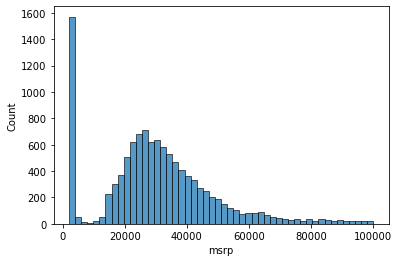

In [12]:
sns.histplot(df.msrp[df.msrp<100000], bins = 50)

In [13]:
np.log1p([0,1,10,100,1000,10000,100000])

array([ 0.        ,  0.69314718,  2.39789527,  4.61512052,  6.90875478,
        9.21044037, 11.51293546])

In [14]:
price_logs = np.log1p(df.msrp)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

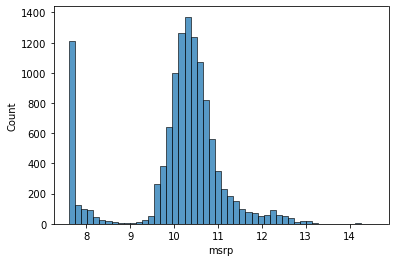

In [15]:
sns.histplot(price_logs, bins = 50)

In [16]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [17]:
len(df)

11914

In [18]:
df.shape

(11914, 16)

In [19]:
n = len(df)

n_val = int(len(df)* 0.2)
n_test = int(len(df)* 0.2)
n_train = n - n_val - n_test

(n,n_train+n_test+n_val)

(11914, 11914)

In [20]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train + n_val]
df_test = df.iloc[n_train + n_val:]

In [21]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [22]:
np.random.seed(2)
np.random.shuffle(idx)

In [23]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [24]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [25]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [26]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [27]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [28]:
def dot(xi, w):
    n = len(xi)
    res = 0 
    for j in range(n):
        res = res+ xi[j] + w[j]
        
    return res

In [29]:
def linear_regression(xi):
    return w0 + dot(xi,w)

In [30]:
df_train.iloc[10:13]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
10,rolls-royce,phantom_drophead_coupe,2015,premium_unleaded_(required),453.0,12.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,performance",large,convertible,19,11,86
11,chevrolet,equinox,2015,regular_unleaded,182.0,4.0,automatic,all_wheel_drive,4.0,"crossover,flex_fuel",compact,4dr_suv,29,20,1385
12,mitsubishi,eclipse_spyder,2011,regular_unleaded,162.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,27,20,436


In [31]:
xi = [185,24,17]
w0 = 7.17
w = [0.01,0.04,0.002]

In [32]:
def linear_regression(xi):
    n = len(xi)
    pred = w0

    for j in range(n):
        pred = pred + w[j]* xi[j]
        
    return pred

In [33]:
exp_pred = linear_regression(xi)
np.expm1(exp_pred)

22336.00501837493

In [34]:
w = [w0] + w
xi = [1] + xi

In [35]:
def linear_regression(xi):
    y_pred = np.array(xi).T.dot(w)
    return y_pred

In [36]:
linear_regression(xi)
np.expm1(linear_regression(xi))

22336.00501837489

In [37]:
df_train.shape

(7150, 15)

In [38]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [46]:
base = ['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']
X = df_train[base]
X

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [47]:
X.isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [53]:
X['engine_hp'] = X['engine_hp'].fillna(0)

<ipython-input-53-f5d5e275bdc5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['engine_hp'] = X['engine_hp'].fillna(0)


In [54]:
X['engine_cylinders'] = X['engine_cylinders'].fillna(0)

<ipython-input-54-73930f7eb389>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['engine_cylinders'] = X['engine_cylinders'].fillna(0)


In [55]:
X.isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [57]:
X = np.array(X)

In [59]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., ..., 1., 1., 1.])

In [63]:
X = np.column_stack([ones,X])

In [68]:
XTX = X.T.dot(X)
XTX

array([[7.15000000e+03, 1.77096800e+06, 4.01640000e+04, 1.90791000e+05,
        1.41417000e+05, 1.10134780e+07],
       [1.77096800e+06, 5.26312546e+08, 1.10523090e+07, 4.42938430e+07,
        3.19585650e+07, 2.76719913e+09],
       [4.01640000e+04, 1.10523090e+07, 2.48592000e+05, 1.00038400e+06,
        7.25427000e+05, 6.26973600e+07],
       [1.90791000e+05, 4.42938430e+07, 1.00038400e+06, 5.70730700e+06,
        4.29308600e+06, 2.92392631e+08],
       [1.41417000e+05, 3.19585650e+07, 7.25427000e+05, 4.29308600e+06,
        3.39193500e+06, 2.18005610e+08],
       [1.10134780e+07, 2.76719913e+09, 6.26973600e+07, 2.92392631e+08,
        2.18005610e+08, 3.17031076e+10]])

In [70]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv 

array([[ 6.73882891e-03,  2.13298726e-06, -7.06733274e-04,
        -1.03403568e-04, -1.38459454e-05, -8.06576754e-08],
       [ 2.13298726e-06,  2.94421884e-08, -1.50951287e-06,
        -5.21208733e-08,  2.24056573e-08,  1.06190779e-12],
       [-7.06733274e-04, -1.50951287e-06,  1.47897214e-04,
         7.46516165e-06,  2.83957507e-06, -3.59120512e-09],
       [-1.03403568e-04, -5.21208733e-08,  7.46516165e-06,
         6.57645364e-06, -5.14659188e-06,  4.44598255e-10],
       [-1.38459454e-05,  2.24056573e-08,  2.83957507e-06,
        -5.14659188e-06,  6.62023576e-06, -8.19028723e-10],
       [-8.06576754e-08,  1.06190779e-12, -3.59120512e-09,
         4.44598255e-10, -8.19028723e-10,  6.81036614e-11]])

In [88]:
w = XTX_inv.dot(X.T).dot(y_train)
w

array([ 7.92725739e+00,  9.70589522e-03, -1.59103494e-01,  1.43792133e-02,
        1.49441072e-02, -9.06908672e-06])

In [107]:
w0 = w[0]
w1 = w[1:]
w0, w1

(7.927257388069998,
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

In [125]:
def rmse_error(y1,y2):
    error = y1-y2
    rmse = np.sqrt((error**2).mean())
    return rmse

In [111]:
X_val = df_val[base]
X_val

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,200.0,4.0,25,19,1385
1,241.0,4.0,29,22,617
2,160.0,4.0,36,26,5657
3,290.0,6.0,34,21,204
4,170.0,4.0,34,25,873
...,...,...,...,...,...
2377,240.0,4.0,37,25,870
2378,444.0,8.0,20,13,238
2379,332.0,8.0,23,20,1624
2380,148.0,4.0,34,24,436


In [113]:
X_val.isnull().sum()

engine_hp           16
engine_cylinders     7
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [114]:
X_val['engine_hp'] = X_val['engine_hp'].fillna(0)
X_val['engine_cylinders'] = X_val['engine_cylinders'].fillna(0)
X_val.isnull().sum()

<ipython-input-114-02619f336a76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val['engine_hp'] = X_val['engine_hp'].fillna(0)
<ipython-input-114-02619f336a76>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val['engine_cylinders'] = X_val['engine_cylinders'].fillna(0)


engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [117]:
ones_val = np.ones(X_val.shape[0])
ones_val

array([1., 1., 1., ..., 1., 1., 1.])

In [119]:
X_val = np.column_stack([ones_val,X_val])
X_val

array([[1.000e+00, 2.000e+02, 4.000e+00, 2.500e+01, 1.900e+01, 1.385e+03],
       [1.000e+00, 2.410e+02, 4.000e+00, 2.900e+01, 2.200e+01, 6.170e+02],
       [1.000e+00, 1.600e+02, 4.000e+00, 3.600e+01, 2.600e+01, 5.657e+03],
       ...,
       [1.000e+00, 3.320e+02, 8.000e+00, 2.300e+01, 2.000e+01, 1.624e+03],
       [1.000e+00, 1.480e+02, 4.000e+00, 3.400e+01, 2.400e+01, 4.360e+02],
       [1.000e+00, 2.900e+02, 6.000e+00, 2.500e+01, 1.800e+01, 1.720e+03]])

In [121]:
y_pred_val = X_val.dot(w.T)
y_pred_val

array([ 9.86288014, 10.37013608,  9.69868129, ..., 10.4916625 ,
        9.57091361, 10.40022147])

In [126]:
rmse_error(y_pred_val,y_val)

0.761653099130159

<AxesSubplot:ylabel='Count'>

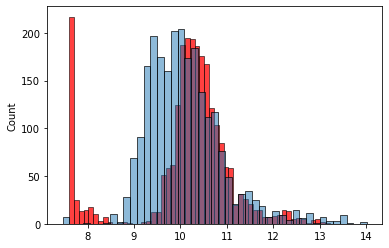

In [130]:
sns.histplot(y_val, color = 'red')
sns.histplot(y_pred_val, alpha = 0.5)

In [196]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [198]:
df['year'].max()
df['number_of_doors'].unique

<bound method Series.unique of 0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
11909    4.0
11910    4.0
11911    4.0
11912    4.0
11913    4.0
Name: number_of_doors, Length: 11914, dtype: float64>

In [232]:
make_list = df['make'].value_counts().index.tolist()
make_list

['chevrolet',
 'ford',
 'volkswagen',
 'toyota',
 'dodge',
 'nissan',
 'gmc',
 'honda',
 'mazda',
 'cadillac',
 'mercedes-benz',
 'suzuki',
 'bmw',
 'infiniti',
 'audi',
 'hyundai',
 'volvo',
 'subaru',
 'acura',
 'kia',
 'mitsubishi',
 'lexus',
 'buick',
 'chrysler',
 'pontiac',
 'lincoln',
 'oldsmobile',
 'land_rover',
 'porsche',
 'saab',
 'aston_martin',
 'plymouth',
 'bentley',
 'ferrari',
 'fiat',
 'scion',
 'maserati',
 'lamborghini',
 'rolls-royce',
 'lotus',
 'tesla',
 'hummer',
 'maybach',
 'alfa_romeo',
 'mclaren',
 'spyker',
 'genesis',
 'bugatti']

In [231]:
model_list = df['model'].value_counts().index.tolist()
model_list

['silverado_1500',
 'tundra',
 'f-150',
 'sierra_1500',
 'beetle_convertible',
 'tacoma',
 'gti',
 'frontier',
 'beetle',
 'accord',
 'civic',
 'dakota',
 'ram_pickup_1500',
 'jetta',
 'corvette',
 '911',
 'c/k_1500_series',
 'xc60',
 'colorado',
 '3',
 '370z',
 'sienna',
 'golf_gti',
 'silverado_1500_classic',
 'sierra_1500_classic',
 'e-class',
 'f-250',
 'pilot',
 'transit_wagon',
 'canyon',
 'a3',
 'transit_connect',
 'passat',
 'jetta_gli',
 'jetta_sportwagen',
 'cts',
 'ram_150',
 'b-series_pickup',
 'sonic',
 'xl7',
 'ats',
 'sorento',
 'truck',
 'c-class',
 'ranger',
 'q50',
 'expedition',
 'new_beetle',
 'sonata',
 'titan',
 'ats_coupe',
 's-10',
 'range_rover',
 'corolla',
 'forenza',
 'mdx',
 '3_series',
 '350z',
 'impreza',
 'camaro',
 'sx4',
 'challenger',
 'cr-v',
 'kizashi',
 'camry_solara',
 'acadia',
 '9-3',
 'cc',
 'v8_vantage',
 'jimmy',
 'aerio',
 's-10_blazer',
 'tribute',
 'esteem',
 'journey',
 'b9_tribeca',
 'juke',
 'trailblazer',
 'escalade',
 'escalade_esv',


In [233]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    features.append('age')
    
    df['age'] = 2017 - df['year'] + 1
    
    for v in [2,3,4]:
        df['%s_doors' % v] = (df['number_of_doors'] == v).astype(int)
        features.append('%s_doors' % v)
     
    for make in make_list:
        df['make_%s'% make] = (df['make'] == make).astype(int)
        features.append('make_%s'% make)
    
    for model in model_list:
        df['model_%s'% model] = (df['model'] == model).astype(int)
        features.append('model_%s'% model)
        
    df_sub = df[features]
    df_sub = df_sub.fillna(0)
    print(df_sub.shape)
    
    X_sub = np.column_stack([np.ones(df_sub.shape[0]),df_sub])
    
    return X_sub

In [145]:
df_val.isna().sum()

make                   0
model                  0
year                   0
engine_fuel_type       0
engine_hp             16
engine_cylinders       7
transmission_type      0
driven_wheels          0
number_of_doors        0
market_category      761
vehicle_size           0
vehicle_style          0
highway_mpg            0
city_mpg               0
popularity             0
dtype: int64

In [234]:
X_train_new = prepare_X(df_train)
X_train_new

<ipython-input-233-a2a5ea3d6119>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['model_%s'% model] = (df['model'] == model).astype(int)
<ipython-input-233-a2a5ea3d6119>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['model_%s'% model] = (df['model'] == model).astype(int)
<ipython-input-233-a2a5ea3d6119>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

<ipython-input-233-a2a5ea3d6119>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['model_%s'% model] = (df['model'] == model).astype(int)
<ipython-input-233-a2a5ea3d6119>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['model_%s'% model] = (df['model'] == model).astype(int)
<ipython-input-233-a2a5ea3d6119>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

<ipython-input-233-a2a5ea3d6119>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['model_%s'% model] = (df['model'] == model).astype(int)
<ipython-input-233-a2a5ea3d6119>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['model_%s'% model] = (df['model'] == model).astype(int)
<ipython-input-233-a2a5ea3d6119>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

(7150, 971)


array([[  1., 148.,   4., ...,   0.,   0.,   0.],
       [  1., 132.,   4., ...,   0.,   0.,   0.],
       [  1., 148.,   4., ...,   0.,   0.,   0.],
       ...,
       [  1., 285.,   6., ...,   0.,   0.,   0.],
       [  1., 563.,  12., ...,   0.,   0.,   0.],
       [  1., 200.,   4., ...,   0.,   0.,   0.]])

In [235]:
def train_linear_regression(X,y):
    XTX_train = X.T.dot(X)
    XTX_inv_train = np.linalg.inv(XTX_train)
    w = XTX_inv_train.dot(X.T).dot(y_train)
    
    return w

In [236]:
def train_linear_regression_reg(X,y, r):
    XTX_train = X.T.dot(X)
    XTX_train = XTX_train + r * np.eye(XTX_train.shape[0])
    
    XTX_inv_train = np.linalg.inv(XTX_train)
    w = XTX_inv_train.dot(X.T).dot(y_train)
    
    return w

In [237]:
w_new = train_linear_regression(X_train_new, y_train)
w_new

LinAlgError: Singular matrix

In [238]:
w_new_reg = train_linear_regression_reg(X_train_new, y_train, r = 0.001)
w_new_reg

array([ 9.77505198e+00,  1.87321175e-03,  1.84615687e-02, -1.00533509e-03,
        4.12825078e-03,  3.25332229e-05, -3.87713379e-02,  2.19215898e-02,
        8.00517888e-02,  9.32731945e-02,  2.80599357e-01, -6.38495727e-01,
       -8.35533035e-01, -3.55308300e-01, -2.11751404e-01, -1.28746381e+00,
       -1.74289474e+00, -2.13411682e-01,  5.05220514e-01,  6.44377349e-02,
       -2.05254589e-02, -3.97402924e-01,  4.19879099e-01,  1.33941370e-01,
       -9.42008212e-01, -2.14876431e-01, -8.96280137e-01, -3.93924184e-01,
       -5.39896978e-02, -1.79562252e-01, -4.01108796e-01,  2.38886421e-01,
       -3.06734976e-01,  6.39452096e-01, -2.92582714e-01, -1.85749437e-01,
       -1.16999449e+00,  4.64350256e-01,  2.97218432e-01, -1.79488529e-01,
        1.33743785e+00, -9.27604204e-01,  1.78578091e+00,  1.61620632e+00,
       -6.98025331e-02,  2.03530119e+00,  1.83099382e+00,  1.61536845e+00,
        1.75196662e+00,  7.94900724e-01,  6.40713340e-01,  1.95412189e-01,
        1.78504454e+00,  

In [239]:
X_val_new = prepare_X(df_val)

<ipython-input-233-a2a5ea3d6119>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['model_%s'% model] = (df['model'] == model).astype(int)
<ipython-input-233-a2a5ea3d6119>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['model_%s'% model] = (df['model'] == model).astype(int)
<ipython-input-233-a2a5ea3d6119>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

<ipython-input-233-a2a5ea3d6119>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['model_%s'% model] = (df['model'] == model).astype(int)
<ipython-input-233-a2a5ea3d6119>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['model_%s'% model] = (df['model'] == model).astype(int)
<ipython-input-233-a2a5ea3d6119>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

(2382, 971)


In [240]:
y_pred_val_new = X_val_new.dot(w_new_reg.T)
y_pred_val_new

array([10.15597592, 10.88610461, 10.05283911, ..., 11.34153224,
        9.93580023, 10.46613556])

In [241]:
rmse_error(y_val,y_pred_val_new)

0.2162061075419531

<AxesSubplot:ylabel='Count'>

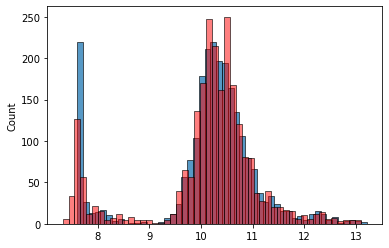

In [242]:
sns.histplot(y_val,bins = 50)
sns.histplot(y_pred_val_new, bins = 50, alpha = 0.5, color = 'red')

In [244]:
X_test_new = prepare_X(df_test)

<ipython-input-233-a2a5ea3d6119>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['model_%s'% model] = (df['model'] == model).astype(int)
<ipython-input-233-a2a5ea3d6119>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['model_%s'% model] = (df['model'] == model).astype(int)
<ipython-input-233-a2a5ea3d6119>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

<ipython-input-233-a2a5ea3d6119>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['model_%s'% model] = (df['model'] == model).astype(int)
<ipython-input-233-a2a5ea3d6119>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['model_%s'% model] = (df['model'] == model).astype(int)
<ipython-input-233-a2a5ea3d6119>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

(2382, 971)


In [245]:
y_pred_test_new = X_test_new.dot(w_new_reg.T)
y_pred_test_new

array([ 7.55595842,  8.11592079, 10.46336064, ..., 10.13585877,
       10.06132697, 10.39550381])

In [246]:
rmse_error(y_pred_test_new,y_test)

0.23667471083312275